In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
# read the accuracy results
# for all layers

accuracy_df_complex = pd.read_csv('eval_results/probing_complex_with_inference_split.csv')
accuracy_df_complex

accuracy_df_simple = pd.read_csv('eval_results/probing_simple_with_inference_split.csv')
accuracy_df_simple

# concatenate the two dataframes
accuracy_df = pd.concat([accuracy_df_simple, accuracy_df_complex], ignore_index=True)
accuracy_df

accuracy_df['label_name'].fillna('counting', inplace=True)

/tmp/ipykernel_545184/1882191122.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accuracy_df['label_name'].fillna('counting', inplace=True)


In [48]:
accuracy_df

,query_type,label_name,n_classes,n_samples,n_test,n_right,n_false,acc_all,acc_right,acc_false
0,count,counting,4,2726,546,525,21,0.935897,0.954286,0.476190
1,recognition_shape,answer,2,5345,1069,851,218,0.980355,0.997650,0.912844
2,recognition_shape,concept,4,5345,1069,851,218,0.785781,0.780259,0.807339
3,recognition_color,answer,2,5452,1091,1057,34,0.977085,1.000000,0.264706
4,recognition_color,concept,8,5452,1091,1054,37,0.402383,0.393738,0.648649
5,recognition_shape_and_color,answer,2,5452,1091,1084,7,0.994500,1.000000,0.142857
6,recognition_shape_and_color,queried_color,8,5452,1091,1083,8,0.648029,0.650970,0.250000
7,recognition_shape_and_color,queried_shape,4,5452,1091,1085,6,0.828598,0.833180,0.000000
8,recognition_shape_and_color,concept,32,5452,1091,1084,7,0.507791,0.510148,0.142857
9,explicit_connection,connection_count,4,2244,449,228,221,0.966592,0.982456,0.950226


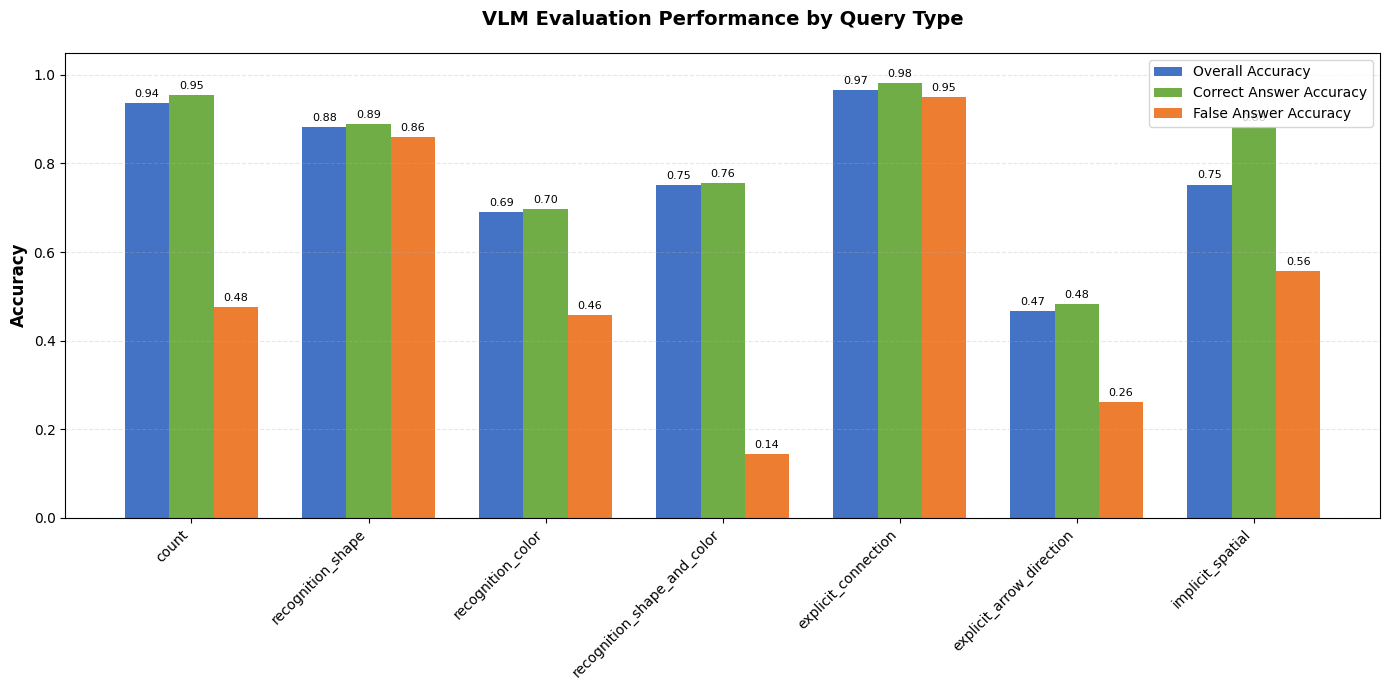


Summary Statistics:

count (label: counting):
  Overall Accuracy:        93.59%
  Correct Answer Accuracy: 95.43%
  False Answer Accuracy:   47.62%
  Gap (Right - False):     47.81%

recognition_shape (label: answer, concept):
  Overall Accuracy:        88.31%
  Correct Answer Accuracy: 88.90%
  False Answer Accuracy:   86.01%
  Gap (Right - False):     2.89%

recognition_color (label: answer, concept):
  Overall Accuracy:        68.97%
  Correct Answer Accuracy: 69.69%
  False Answer Accuracy:   45.67%
  Gap (Right - False):     24.02%

recognition_shape_and_color (label: answer, concept):
  Overall Accuracy:        75.11%
  Correct Answer Accuracy: 75.51%
  False Answer Accuracy:   14.29%
  Gap (Right - False):     61.22%

explicit_connection (label: connection_count):
  Overall Accuracy:        96.66%
  Correct Answer Accuracy: 98.25%
  False Answer Accuracy:   95.02%
  Gap (Right - False):     3.22%

explicit_arrow_direction (label: target_shape, target_color):
  Overall Accuracy:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter the data for specific query types and labels
query_label_mapping = {
    'count': 'counting',
    'recognition_shape': ['answer', 'concept'],
    'recognition_color': ['answer', 'concept'],
    'recognition_shape_and_color': ['answer', 'concept'],
    'explicit_connection': 'connection_count',
    'explicit_arrow_direction': ['target_shape', 'target_color'],
    'implicit_spatial': 'direction'
}

# Filter accuracy_df based on the mapping
filtered_rows = []
for query_type, label_name in query_label_mapping.items():
    if isinstance(label_name, list):
        # For multiple labels, take the mean
        mask = (accuracy_df['query_type'] == query_type) & (accuracy_df['label_name'].isin(label_name))
        if mask.any():
            row = accuracy_df[mask][['acc_all', 'acc_right', 'acc_false']].mean()
            row['query_type'] = query_type
            row['label_name'] = ', '.join(label_name)
            filtered_rows.append(row)
    else:
        mask = (accuracy_df['query_type'] == query_type) & (accuracy_df['label_name'] == label_name)
        if mask.any():
            filtered_rows.append(accuracy_df[mask].iloc[0])

# Create a new dataframe with filtered data
plot_df = pd.DataFrame(filtered_rows)

# Prepare data for plotting
query_types = plot_df['query_type'].values
acc_all = plot_df['acc_all'].values
acc_right = plot_df['acc_right'].values
acc_false = plot_df['acc_false'].values
labels = plot_df['label_name'].values

# Set up the bar chart
x = np.arange(len(query_types))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))

# Create bars
bars1 = ax.bar(x - width, acc_all, width, label='Overall Accuracy', color='#4472C4')
bars2 = ax.bar(x, acc_right, width, label='Correct Answer Accuracy', color='#70AD47')
bars3 = ax.bar(x + width, acc_false, width, label='False Answer Accuracy', color='#ED7D31')

# Customize the chart
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('VLM Evaluation Performance by Query Type', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(query_types, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', fontsize=10)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars (optional)
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

# Uncomment to add value labels
autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# # Add label_name as secondary text
# for i, (query, label) in enumerate(zip(query_types, labels)):
#     ax.text(i, -0.08, f'({label})', ha='center', va='top', 
#             fontsize=8, color='gray', rotation=0, transform=ax.get_xaxis_transform())

plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("\nSummary Statistics:")
print("="*80)
for i, query in enumerate(query_types):
    print(f"\n{query} (label: {labels[i]}):")
    print(f"  Overall Accuracy:        {acc_all[i]:.2%}")
    print(f"  Correct Answer Accuracy: {acc_right[i]:.2%}")
    print(f"  False Answer Accuracy:   {acc_false[i]:.2%}")
    print(f"  Gap (Right - False):     {(acc_right[i] - acc_false[i]):.2%}")

In [17]:
# read the accuracy results
# for per layers

accuracy_df_complex_per_layer = pd.read_csv('eval_results/layer_probing_complex_with_inference_split.csv')
accuracy_df_complex_per_layer

accuracy_df_simple_per_layer = pd.read_csv('eval_results/layer_probing_simple_with_inference_split.csv')
accuracy_df_simple_per_layer

# concatenate the two dataframes
accuracy_df_per_layer = pd.concat([accuracy_df_simple_per_layer, accuracy_df_complex_per_layer], ignore_index=True)
accuracy_df_per_layer

,query_type,label_name,layer,n_classes,n_samples,n_test,n_right,n_false,acc_all,acc_right,acc_false
0,count,NaN,0,4,2726,546,525,21,0.650183,0.649524,0.666667
1,count,NaN,1,4,2726,546,525,21,0.705128,0.704762,0.714286
2,count,NaN,2,4,2726,546,525,21,0.664835,0.664762,0.666667
3,count,NaN,3,4,2726,546,525,21,0.714286,0.720000,0.571429
4,count,NaN,4,4,2726,546,525,21,0.633700,0.636190,0.571429
...,...,...,...,...,...,...,...,...,...,...,...
1219,implicit_spatial,axis,31,2,2280,456,276,180,0.607456,0.721014,0.433333
1220,implicit_spatial,axis,32,2,2280,456,276,180,0.631579,0.735507,0.472222
1221,implicit_spatial,axis,33,2,2280,456,276,180,0.563596,0.637681,0.450000
1222,implicit_spatial,axis,34,2,2280,456,276,180,0.583333,0.637681,0.500000


In [18]:
accuracy_df_per_layer['label_name'].fillna('counting', inplace=True)

/tmp/ipykernel_545184/1730064570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accuracy_df_per_layer['label_name'].fillna('counting', inplace=True)


In [19]:
accuracy_df_per_layer

,query_type,label_name,layer,n_classes,n_samples,n_test,n_right,n_false,acc_all,acc_right,acc_false
0,count,counting,0,4,2726,546,525,21,0.650183,0.649524,0.666667
1,count,counting,1,4,2726,546,525,21,0.705128,0.704762,0.714286
2,count,counting,2,4,2726,546,525,21,0.664835,0.664762,0.666667
3,count,counting,3,4,2726,546,525,21,0.714286,0.720000,0.571429
4,count,counting,4,4,2726,546,525,21,0.633700,0.636190,0.571429
...,...,...,...,...,...,...,...,...,...,...,...
1219,implicit_spatial,axis,31,2,2280,456,276,180,0.607456,0.721014,0.433333
1220,implicit_spatial,axis,32,2,2280,456,276,180,0.631579,0.735507,0.472222
1221,implicit_spatial,axis,33,2,2280,456,276,180,0.563596,0.637681,0.450000
1222,implicit_spatial,axis,34,2,2280,456,276,180,0.583333,0.637681,0.500000


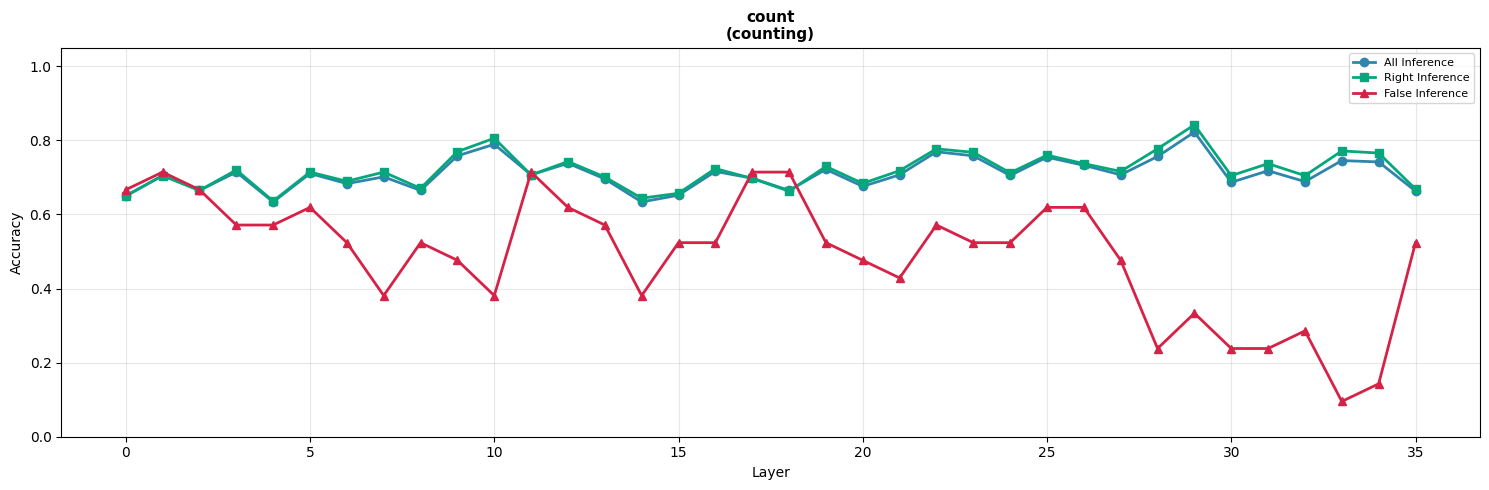

Functions ready to use:
1. plot_grouped_bar_chart(accuracy_df)
2. plot_layer_accuracy_grid(accuracy_df_per_layer)


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# =========================
# PART 1: Grouped Bar Chart for Overall Accuracy
# =========================

def plot_grouped_bar_chart(accuracy_df):
    """Plot grouped bar chart for specific query types and labels"""
    
    # Filter the data for specific query types and labels
    query_label_mapping = {
        'count': 'counting',
        'recognition_shape': ['answer', 'concept'],
        'recognition_color': ['answer', 'concept'],
        'recognition_shape_and_color': ['answer', 'concept'],
        'explicit_connection': 'connection_count',
        'explicit_arrow_direction': ['target_shape', 'target_color'],
        'implicit_spatial': 'direction'
    }

    # Filter accuracy_df based on the mapping
    filtered_rows = []
    for query_type, label_names in query_label_mapping.items():
        if isinstance(label_names, list):
            # For multiple labels, average them
            for label_name in label_names:
                mask = (accuracy_df['query_type'] == query_type) & (accuracy_df['label_name'] == label_name)
                if mask.any():
                    row = accuracy_df[mask].iloc[0].copy()
                    row['display_name'] = f'{query_type}\n({label_name})'
                    filtered_rows.append(row)
        else:
            mask = (accuracy_df['query_type'] == query_type) & (accuracy_df['label_name'] == label_names)
            if mask.any():
                row = accuracy_df[mask].iloc[0].copy()
                row['display_name'] = f'{query_type}\n({label_names})'
                filtered_rows.append(row)

    # Create a new dataframe with filtered data
    plot_df = pd.DataFrame(filtered_rows)

    # Prepare data for plotting
    display_names = plot_df['display_name'].values
    acc_all = plot_df['acc_all'].values
    acc_right = plot_df['acc_right'].values
    acc_false = plot_df['acc_false'].values

    # Set up the bar chart
    x = np.arange(len(display_names))
    width = 0.25

    fig, ax = plt.subplots(figsize=(16, 7))

    # Create bars
    bars1 = ax.bar(x - width, acc_all, width, label='Overall Accuracy', color='#4472C4')
    bars2 = ax.bar(x, acc_right, width, label='Correct Answer Accuracy', color='#70AD47')
    bars3 = ax.bar(x + width, acc_false, width, label='False Answer Accuracy', color='#ED7D31')

    # Customize the chart
    ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax.set_title('VLM Evaluation Performance by Query Type', fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(display_names, rotation=45, ha='right', fontsize=9)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=7)

    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)

    plt.tight_layout()
    plt.show()


# =========================
# PART 2: Line Plots - Accuracy across layers (Grid Layout)
# =========================

def plot_layer_accuracy_grid(accuracy_df_per_layer):
    """Plot accuracy across layers for specific query types in a grid layout"""
    
    query_label_mapping = {
        'count': 'counting',
        # 'recognition_shape': ['answer', 'concept'],
        # 'recognition_color': ['answer', 'concept'],
        # 'recognition_shape_and_color': ['answer', 'concept'],
        # 'explicit_connection': 'connection_count',
        # 'explicit_arrow_direction': ['target_shape', 'target_color'],
        # 'implicit_spatial': ['direction', 'axis']
    }
    
    # Create list of (query_type, label_name) tuples to plot
    combinations = []
    for query_type, label_names in query_label_mapping.items():
        if isinstance(label_names, list):
            for label_name in label_names:
                combinations.append((query_type, label_name))
        else:
            combinations.append((query_type, label_names))
    
    if len(combinations) == 0:
        print("No data to plot")
        return
    
    # Calculate grid dimensions
    n_plots = len(combinations)
    n_cols = 1
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    # Plot each combination
    for idx, (query_type, label_name) in enumerate(combinations):
        # Filter data
        data = accuracy_df_per_layer[
            (accuracy_df_per_layer['query_type'] == query_type) & 
            (accuracy_df_per_layer['label_name'] == label_name)
        ].sort_values('layer')
        
        if len(data) == 0:
            print(f"No data for {query_type} - {label_name}")
            continue
        
        ax = axes[idx]
        
        # Plot lines
        ax.plot(data['layer'], data['acc_all'], marker='o', linewidth=2, 
                label='All Inference', color='#2E86AB', markersize=6)
        
        if 'acc_right' in data.columns and data['acc_right'].notna().any():
            ax.plot(data['layer'], data['acc_right'], marker='s', linewidth=2, 
                    label='Right Inference', color='#06A77D', markersize=6)
        
        if 'acc_false' in data.columns and data['acc_false'].notna().any():
            ax.plot(data['layer'], data['acc_false'], marker='^', linewidth=2, 
                    label='False Inference', color='#D62246', markersize=6)
        
        ax.set_xlabel('Layer', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.set_title(f'{query_type}\n({label_name})', fontsize=11, fontweight='bold')
        ax.legend(fontsize=8, loc='best')
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1.05])
        
        # Set x-axis to show integer layers
        if len(data) > 0:
            ax.set_xticks(data['layer'].unique())

        # set x-axis only appear per 5 layers 
        ax.set_xticks(np.arange(data['layer'].min(), data['layer'].max()+1, 5))
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


# =========================
# USAGE EXAMPLES
# =========================

# Example 1: Plot grouped bar chart (assuming accuracy_df exists)
# plot_grouped_bar_chart(accuracy_df)

# Example 2: Plot layer accuracy grid (assuming accuracy_df_per_layer exists)
plot_layer_accuracy_grid(accuracy_df_per_layer)

print("Functions ready to use:")
print("1. plot_grouped_bar_chart(accuracy_df)")
print("2. plot_layer_accuracy_grid(accuracy_df_per_layer)")


1. Creating line plots in grid...


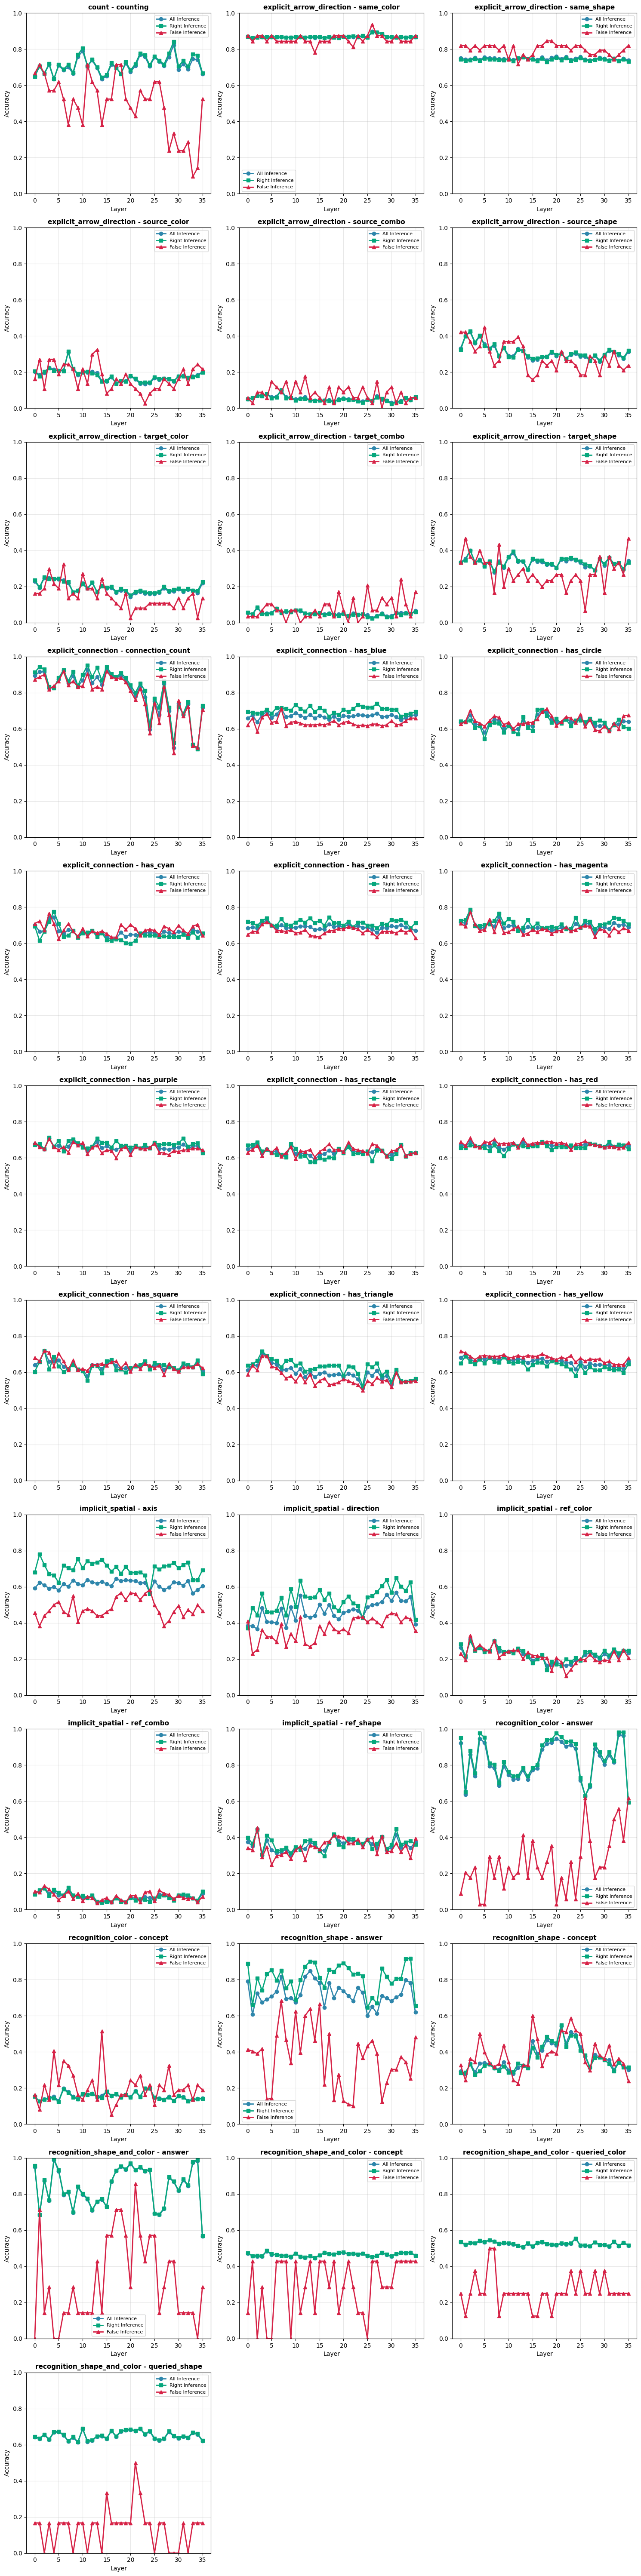

In [20]:
# =========================
# 1. LINE PLOTS - Accuracy across layers (Grid Layout)
# =========================
print("\n1. Creating line plots in grid...")

def plot_layer_accuracy_grid(df, save_prefix="complex"):
    """Plot accuracy across layers for all query types in a grid layout"""
    
    # Get unique combinations of query_type and label_name
    combinations = df.groupby(['query_type', 'label_name']).size().reset_index()[['query_type', 'label_name']]
    
    if len(combinations) == 0:
        return
    
    # Calculate grid dimensions
    n_plots = len(combinations)
    n_cols = 3  # You can adjust this
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    # Plot each combination
    for idx, (_, row) in enumerate(combinations.iterrows()):
        query_type = row['query_type']
        label_name = row['label_name']
        
        # Filter data
        data = df[(df['query_type'] == query_type) & (df['label_name'] == label_name)]
        
        if len(data) == 0:
            continue
        
        ax = axes[idx]
        
        # Plot lines
        ax.plot(data['layer'], data['acc_all'], marker='o', linewidth=2, 
                label='All Inference', color='#2E86AB')
        
        if data['acc_right'].notna().any():
            ax.plot(data['layer'], data['acc_right'], marker='s', linewidth=2, 
                    label='Right Inference', color='#06A77D')
        
        if data['acc_false'].notna().any():
            ax.plot(data['layer'], data['acc_false'], marker='^', linewidth=2, 
                    label='False Inference', color='#D62246')
        
        ax.set_xlabel('Layer', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.set_title(f'{query_type} - {label_name}', fontsize=11, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1])
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all query types in a grid
plot_layer_accuracy_grid(accuracy_df_per_layer, save_prefix="complex")

Overall Patterns:

* High variance in False Inference (red lines) - The red lines are extremely volatile and often drop to very low accuracy, suggesting the probing classifier struggles to decode information from incorrect model predictions. This makes sense - when the model fails, its internal representations may be noisy or inconsistent.
* More stable Right Inference (green lines) - Green lines are generally smoother and more stable, indicating that when the model predicts correctly, its internal representations are more consistent and decodable.
* All Inference (blue) tracks between the two - As expected, the overall accuracy falls between correct and incorrect cases.

Query Type Differences:

* Connection-based tasks (explicit_connection, explicit_arrow_direction) show dramatic differences between right/false inference, with false inference often near random
* Recognition tasks (recognition_shape, recognition_color) are more stable across all inference types
* Spatial tasks show moderate separation between right and false

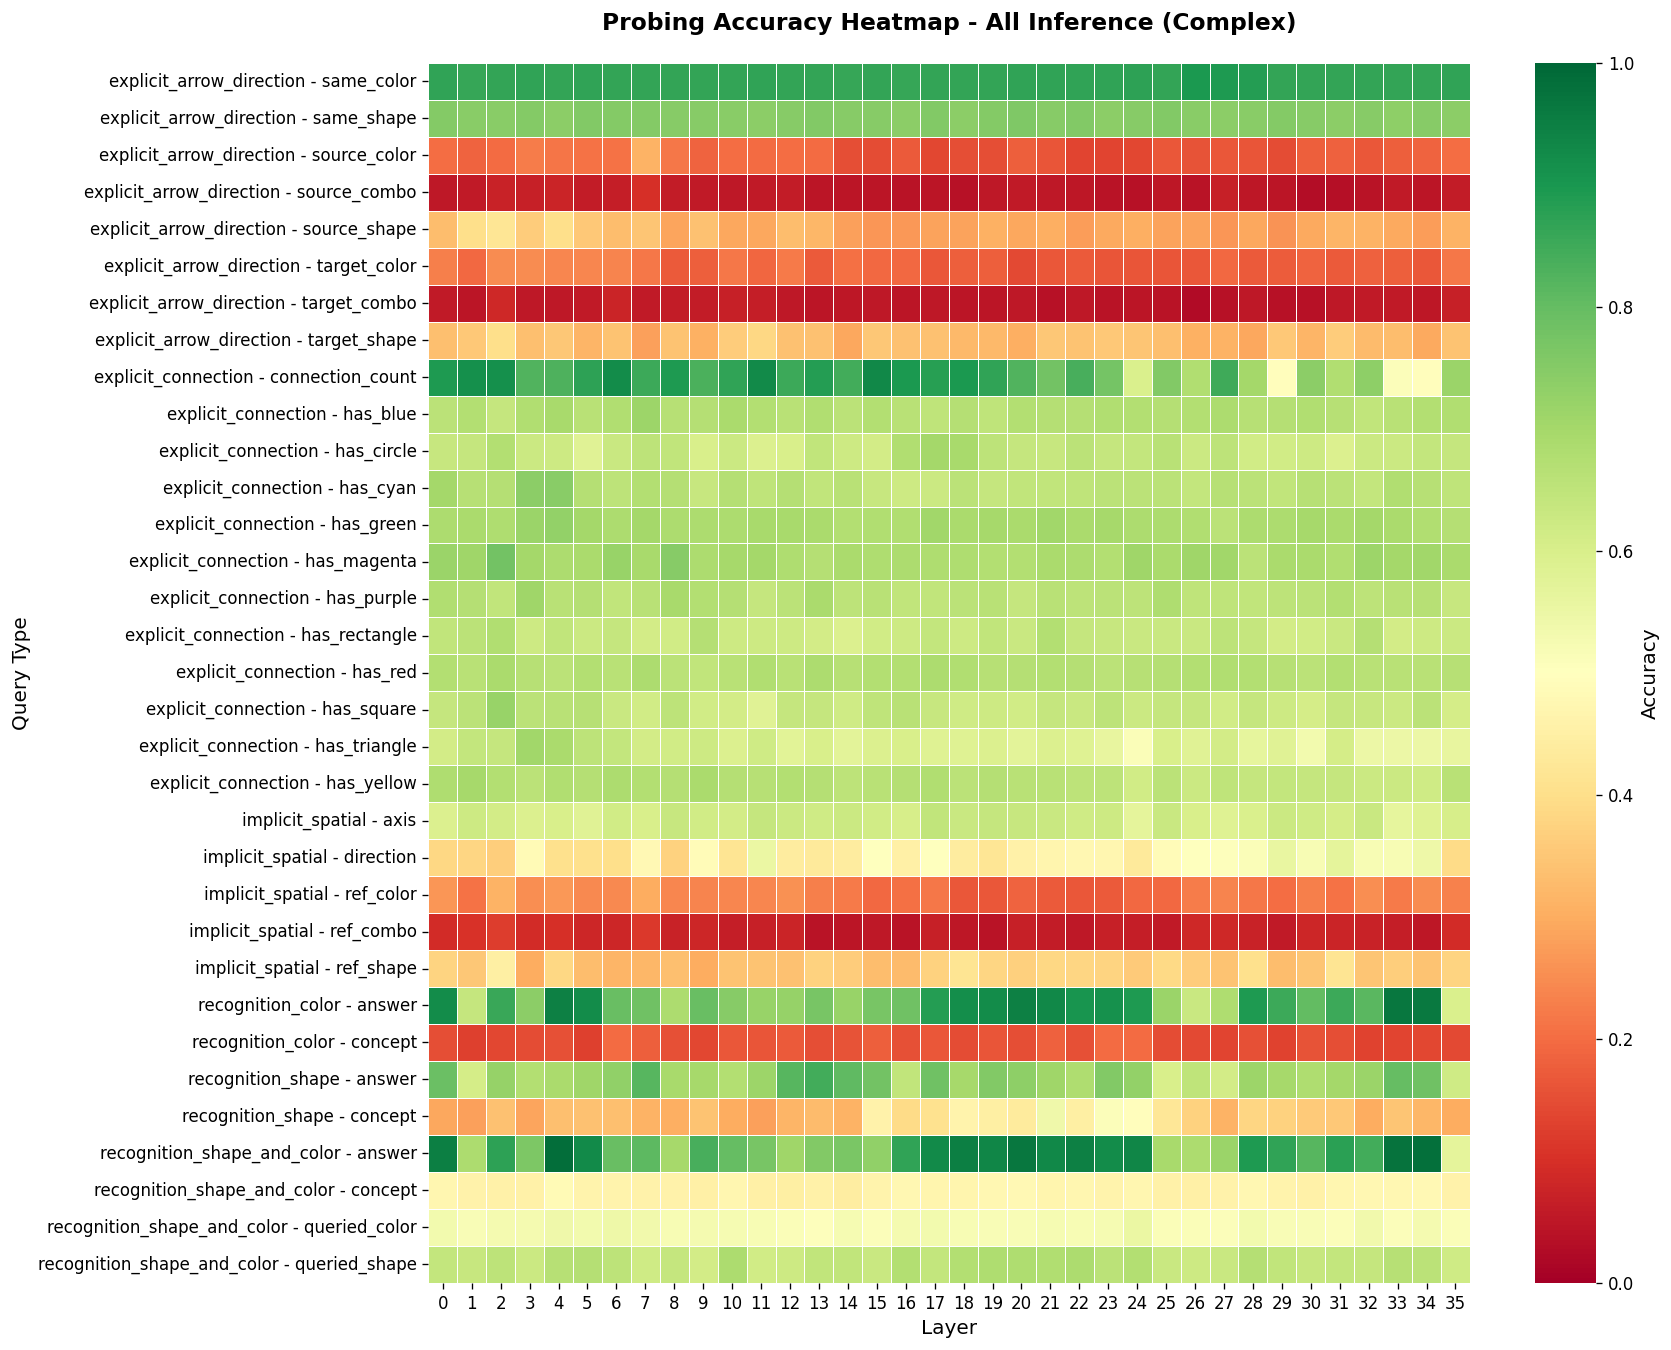

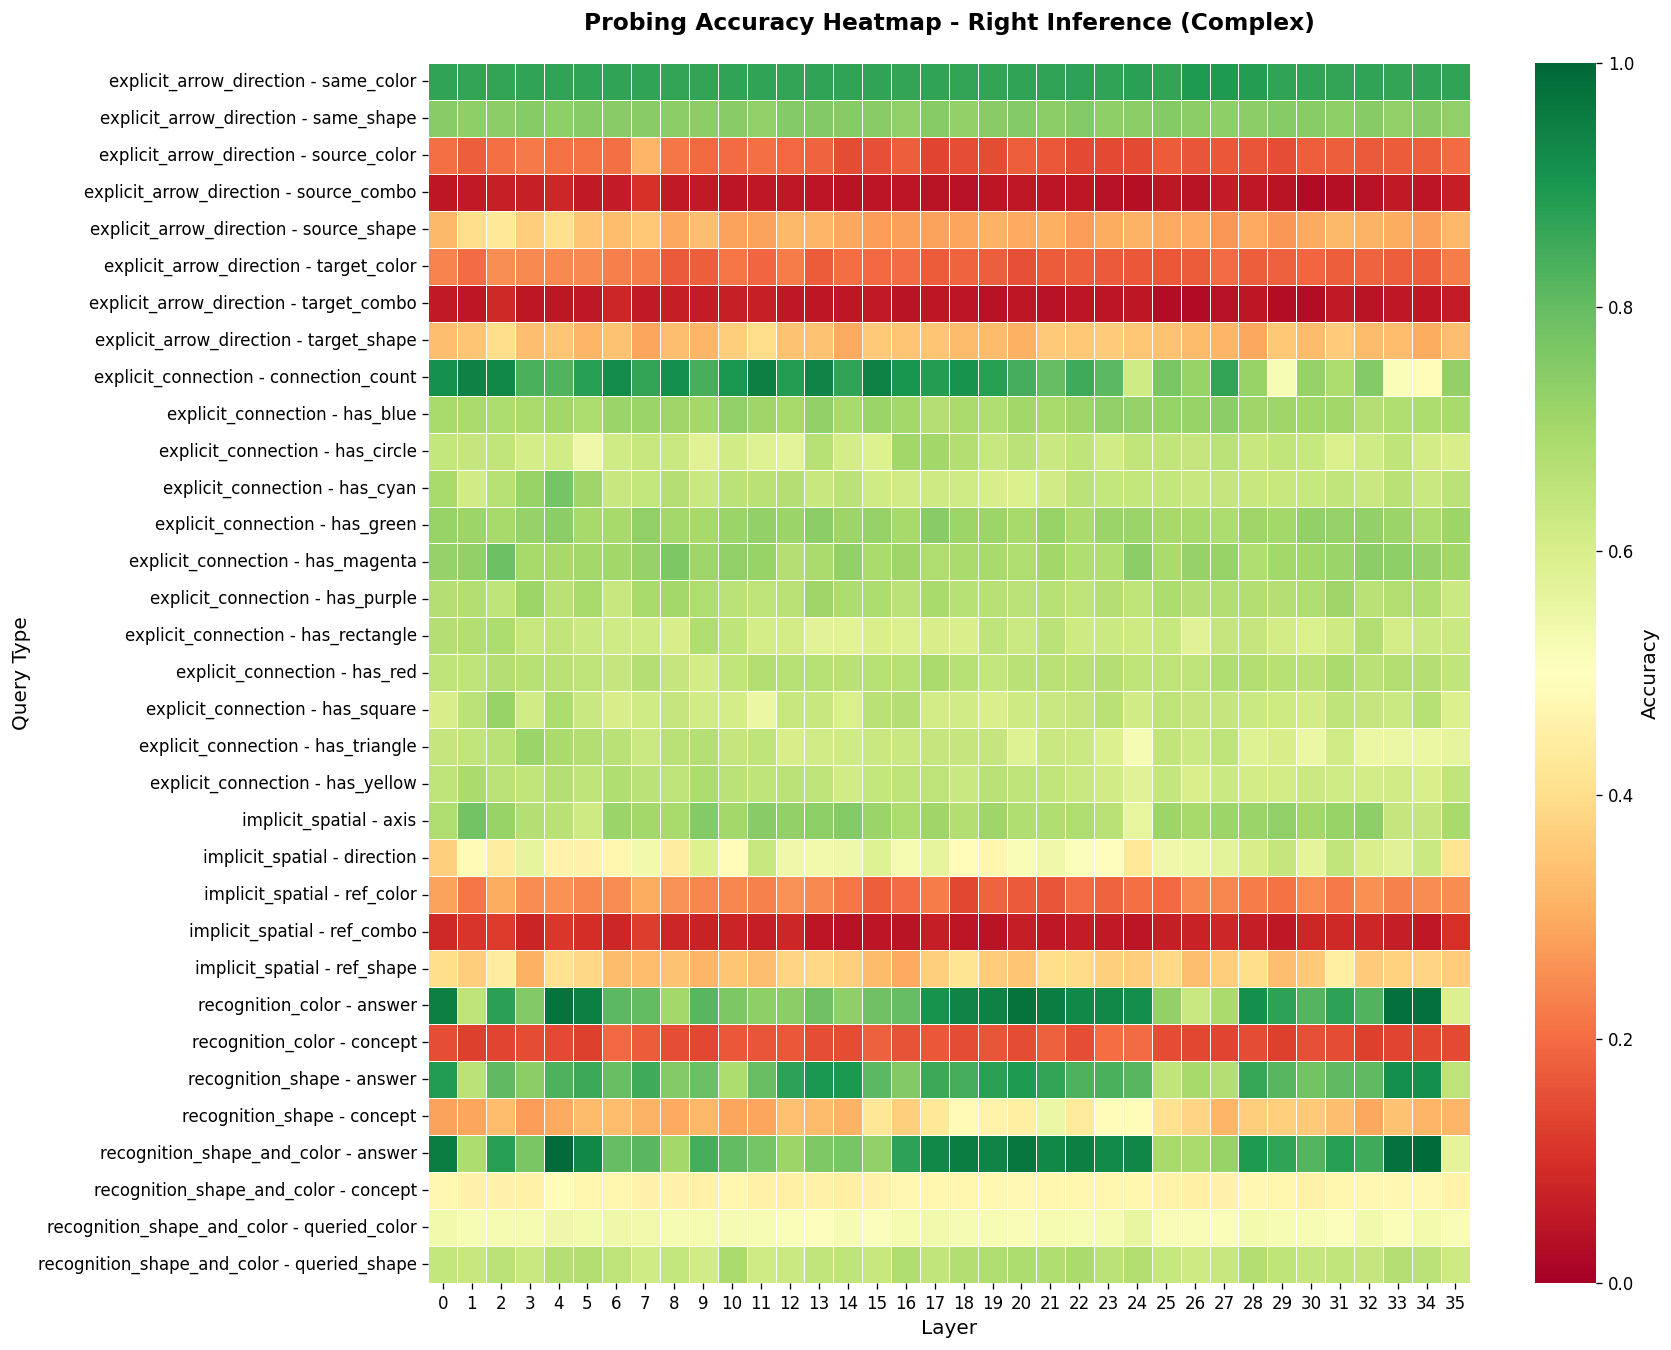

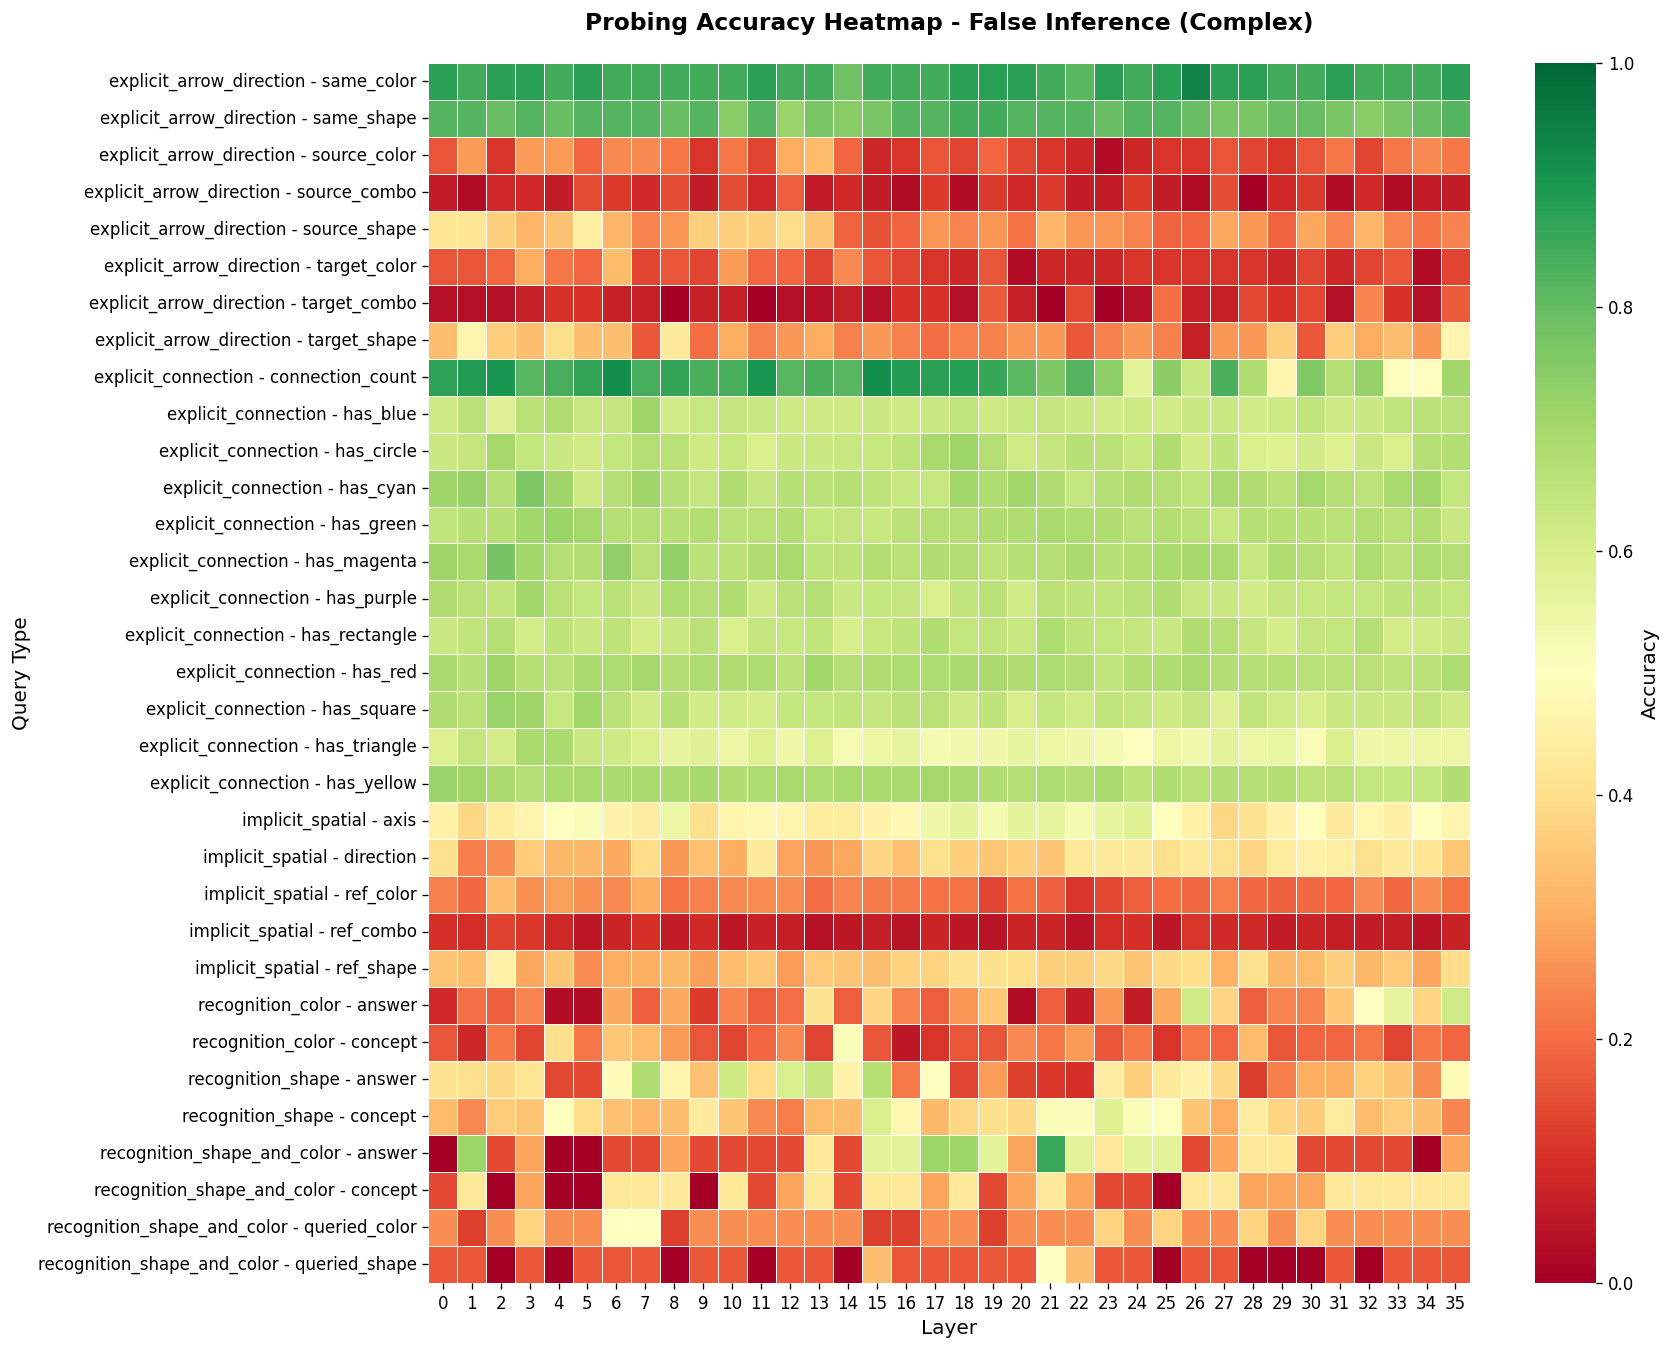

In [24]:
def create_heatmap(df, metric='acc_all', title_suffix='All Inference', filename='heatmap_all.png'):
    """Create heatmap of accuracy across query types and layers"""
    
    # Prepare data for simple types
    if 'label_name' in df.columns:
        # Complex: combine query_type and label_name
        df['full_label'] = df['query_type'] + ' - ' + df['label_name']
        pivot_data = df.pivot_table(values=metric, index='full_label', columns='layer', aggfunc='first')
    else:
        # Simple: just query_type
        pivot_data = df.pivot_table(values=metric, index='query_type', columns='layer', aggfunc='first')
    
    if pivot_data.empty:
        return
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, max(8, len(pivot_data) * 0.4)))
    
    # Create heatmap
    sns.heatmap(pivot_data, annot=False, fmt='.3f', cmap='RdYlGn', 
                vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'},
                linewidths=0.5, ax=ax)
    
    ax.set_title(f'Probing Accuracy Heatmap - {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Query Type', fontsize=12)
    
    plt.show()


create_heatmap(accuracy_df_per_layer, 'acc_all', 'All Inference (Complex)', 'heatmap_complex_all.png')
create_heatmap(accuracy_df_per_layer, 'acc_right', 'Right Inference (Complex)', 'heatmap_complex_right.png')
create_heatmap(accuracy_df_per_layer, 'acc_false', 'False Inference (Complex)', 'heatmap_complex_false.png')




4. Creating difference plots in grid...


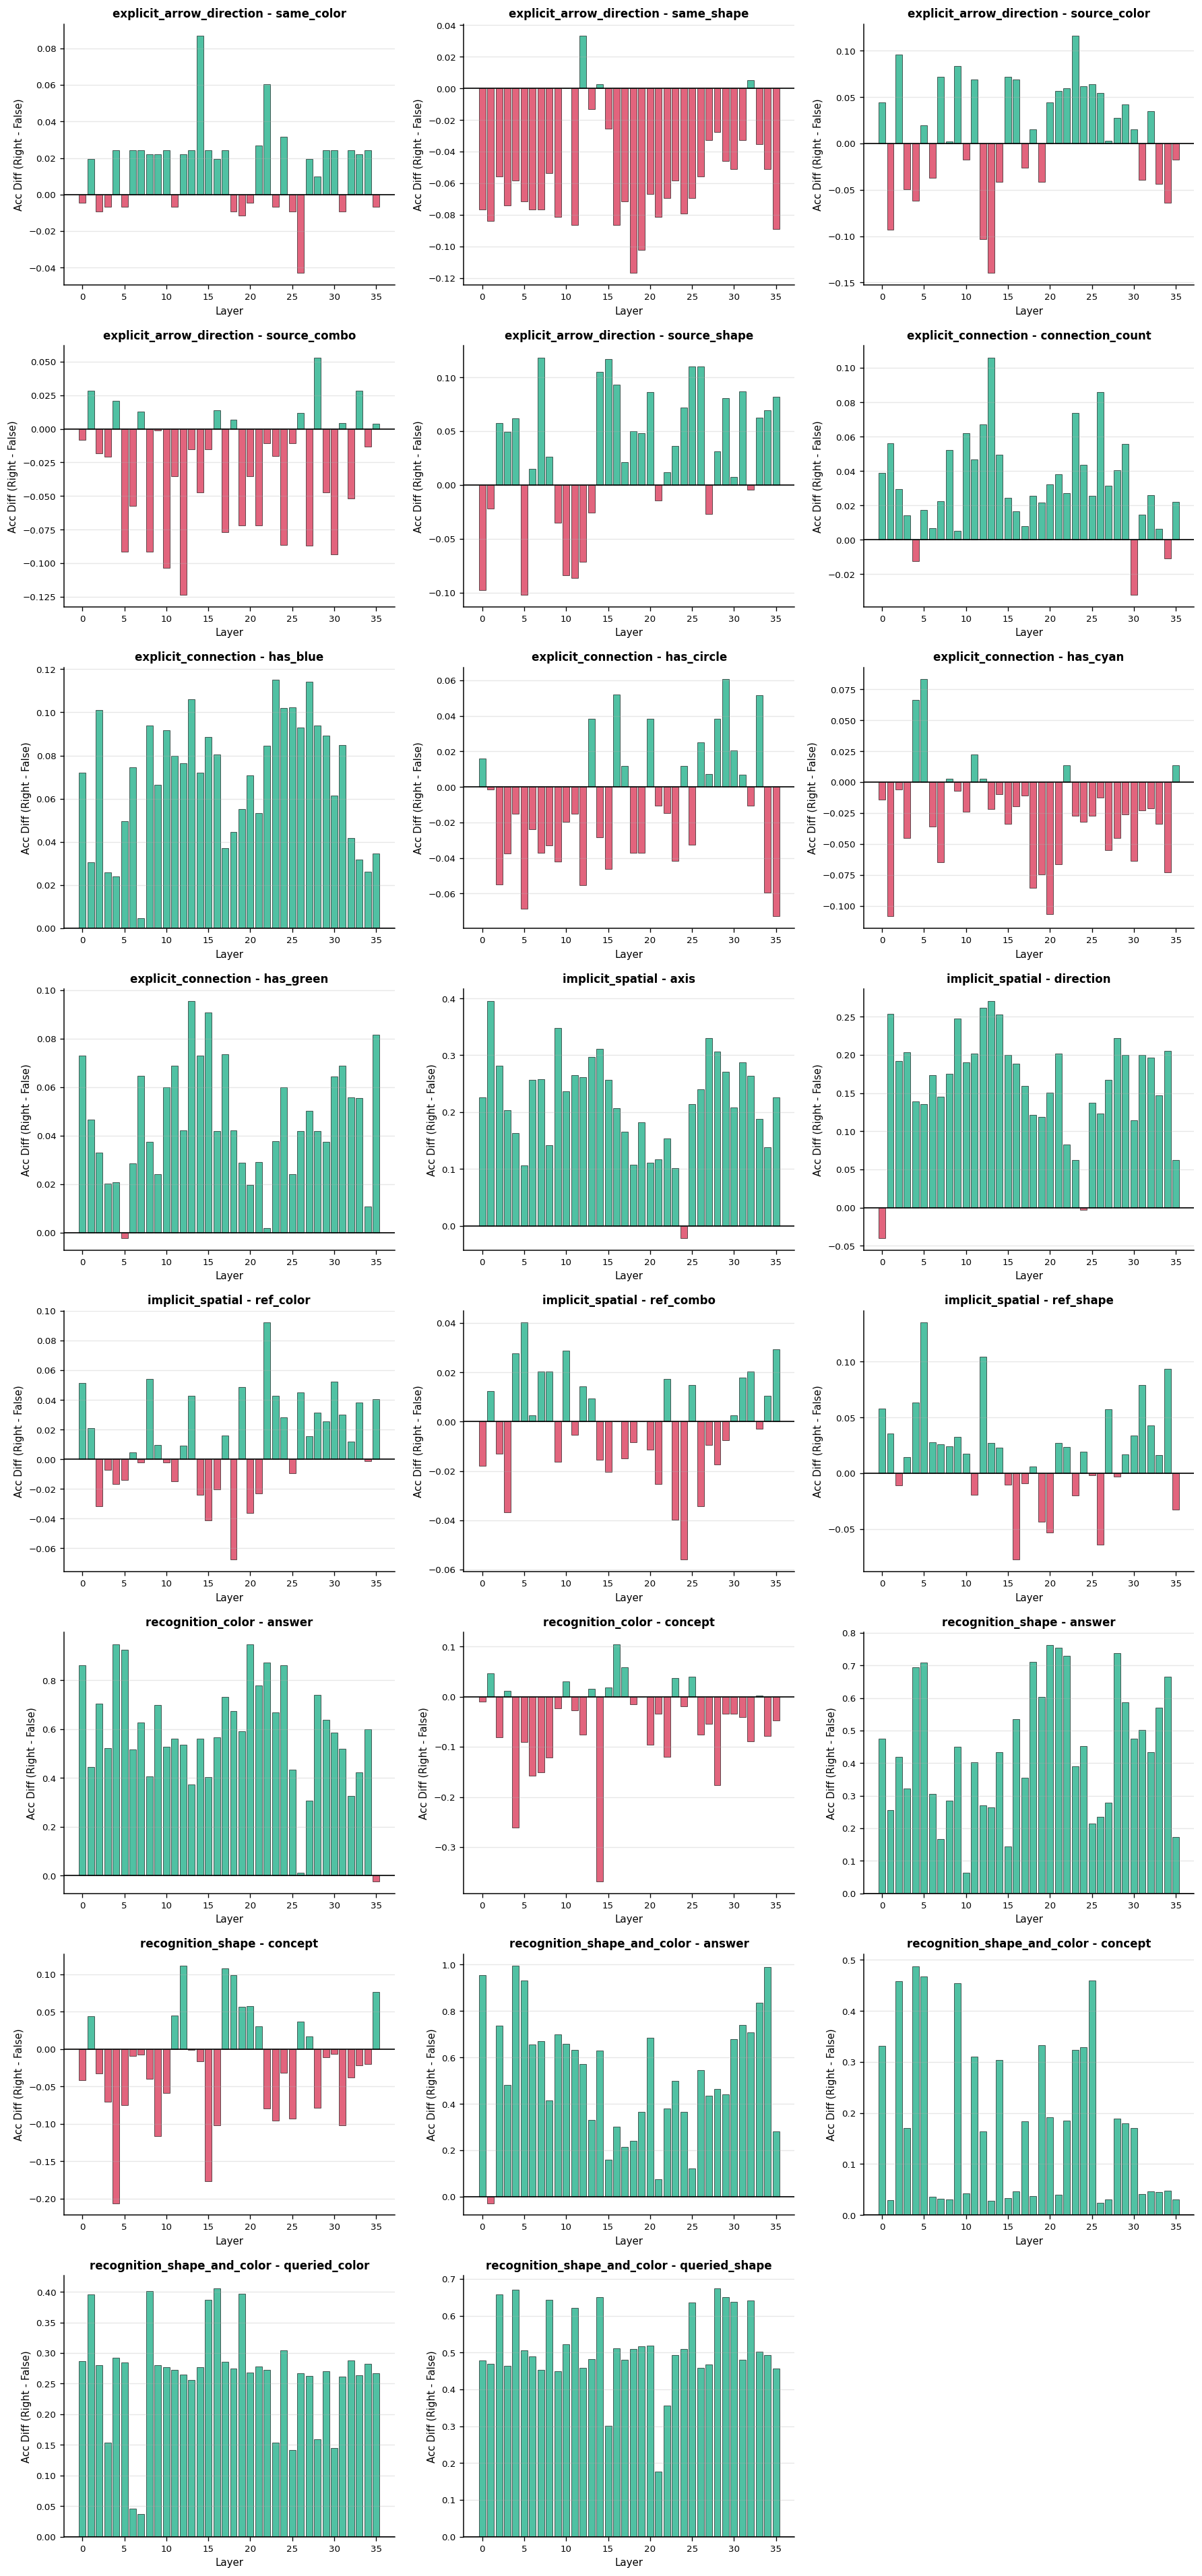

In [26]:
# =========================
# 4. DIFFERENCE PLOTS - Right vs False accuracy (Grid Layout)
# =========================
print("\n4. Creating difference plots in grid...")

def plot_accuracy_difference_grid(df, save_prefix="complex"):
    """Plot difference between right and false inference accuracy in a grid layout"""
    
    # Get unique combinations of query_type and label_name that have both acc_right and acc_false
    valid_data = df[df['acc_right'].notna() & df['acc_false'].notna()]
    combinations = valid_data.groupby(['query_type', 'label_name']).size().reset_index()[['query_type', 'label_name']]
    
    # Limit to first 5 label_names per query_type
    filtered_combinations = []
    for query_type in combinations['query_type'].unique():
        labels = combinations[combinations['query_type'] == query_type]['label_name'].unique()[:5]
        for label_name in labels:
            filtered_combinations.append({'query_type': query_type, 'label_name': label_name})
    
    if len(filtered_combinations) == 0:
        return
    
    # Calculate grid dimensions
    n_plots = len(filtered_combinations)
    n_cols = 3  # You can adjust this
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    # Plot each combination
    for idx, combo in enumerate(filtered_combinations):
        query_type = combo['query_type']
        label_name = combo['label_name']
        
        # Filter data
        data = df[(df['query_type'] == query_type) & (df['label_name'] == label_name)]
        data = data[data['acc_right'].notna() & data['acc_false'].notna()].copy()
        
        if len(data) == 0:
            continue
        
        # Calculate difference
        data['acc_diff'] = data['acc_right'] - data['acc_false']
        
        ax = axes[idx]
        
        # Color bars based on positive/negative difference
        colors = ['#06A77D' if x >= 0 else '#D62246' for x in data['acc_diff']]
        ax.bar(data['layer'], data['acc_diff'], color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
        
        # Add zero line
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        
        ax.set_xlabel('Layer', fontsize=9)
        ax.set_ylabel('Acc Diff (Right - False)', fontsize=9)
        ax.set_title(f'{query_type} - {label_name}', fontsize=10, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        ax.tick_params(labelsize=8)
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all query types in a grid
plot_accuracy_difference_grid(accuracy_df_per_layer, save_prefix="complex")